In [ ]:
!pip install -q kaggle 

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
# upload your kaggle api key 
from google.colab import files 
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"uqnocta","key":"86a8bbdefe0f4c7335b5997e25496f9a"}'}

In [ ]:

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download jcprogjava/handwritten-digits-dataset-not-in-mnist

 60% 33.0M/54.6M [00:00<00:00, 123MB/s] 
100% 54.6M/54.6M [00:00<00:00, 137MB/s]


In [ ]:
!unzip handwritten-digits-dataset-not-in-mnist.zip 

Streaming output truncated to the last 5000 lines.
  inflating: dataset/9/9/5499.png    
  inflating: dataset/9/9/55.png      
  inflating: dataset/9/9/550.png     
  inflating: dataset/9/9/5500.png    
  inflating: dataset/9/9/5501.png    
  inflating: dataset/9/9/5502.png    
  inflating: dataset/9/9/5503.png    
  inflating: dataset/9/9/5504.png    
  inflating: dataset/9/9/5505.png    
  inflating: dataset/9/9/5506.png    
  inflating: dataset/9/9/5507.png    
  inflating: dataset/9/9/5508.png    
  inflating: dataset/9/9/5509.png    
  inflating: dataset/9/9/551.png     
  inflating: dataset/9/9/5510.png    
  inflating: dataset/9/9/5511.png    
  inflating: dataset/9/9/5512.png    
  inflating: dataset/9/9/5513.png    
  inflating: dataset/9/9/5514.png    
  inflating: dataset/9/9/5515.png    
  inflating: dataset/9/9/5516.png    
  inflating: dataset/9/9/5517.png    
  inflating: dataset/9/9/5518.png    
  inflating: dataset/9/9/5519.png    
  inflating: dataset/9/9/552.png     

In [ ]:
img_dir = "dataset"

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

(28, 28, 3)


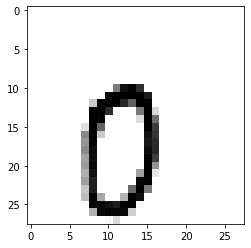

In [ ]:
img_path = "dataset/0/0/1.png"

png_img = Image.open(img_path)
fn_img = Image.new("RGBA",size=png_img.size,color='white')
fn_img.paste(png_img,(0,0),png_img)

jpg_img = fn_img.convert('RGB')

arr = np.asarray(jpg_img)

print(arr.shape)


plt.imshow(arr)

In [ ]:
def transform_to_jpg(img_path): 
  new_image_path = "dataset_jpg"
  for i in range(10): 
    path = os.path.join(img_path,str(i),str(i))
    new_path = os.path.join(new_image_path,str(i))
    print(new_path)
    try : 
      os.makedirs(new_path)
    except:
      print("error")
    for j in os.listdir(path): 
      filename = j.split(sep=".")
      file_name = filename[0] + ".jpg"
      png_img = Image.open(os.path.join(path,j))
      fn_img = Image.new("RGBA",size=png_img.size,color='white')
      fn_img.paste(png_img,(0,0),png_img)
      
      jpg_img = fn_img.convert('RGB')
      jpg_img.save(os.path.join(new_path,file_name))

In [ ]:
transform_to_jpg("dataset")

dataset_jpg/0
dataset_jpg/1
dataset_jpg/2
dataset_jpg/3
dataset_jpg/4
dataset_jpg/5
dataset_jpg/6
dataset_jpg/7
dataset_jpg/8
dataset_jpg/9


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
img_dir = "dataset_jpg"

In [ ]:
data = image_dataset_from_directory(img_dir,image_size=(64,64),color_mode='rgb')

# if your dataset in rgba mode, and you do not set the color_mode ( default to 'rgb' ), then you will get black img

Found 107730 files belonging to 10 classes.


[7 8 1 5 0 7 3 3 7 1 7 6 7 8 6 9 0 2 4 6 7 9 8 3 9 4 4 8 3 9 4 7]


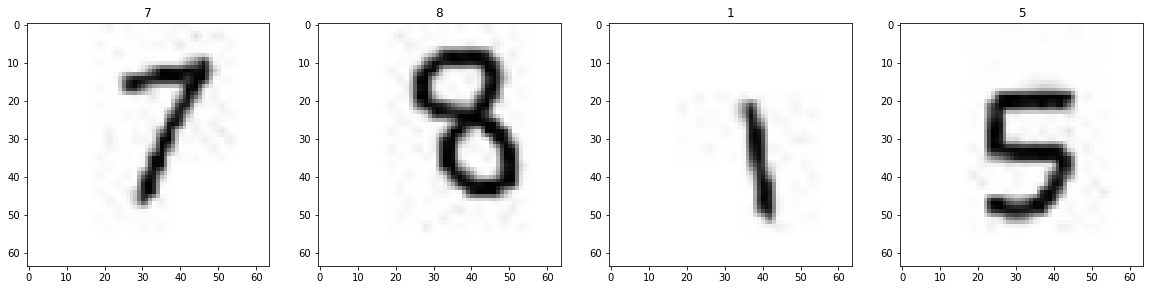

In [ ]:
# check some of our image data 
batch = data.as_numpy_iterator()

preview = batch.next()

print(preview[1])

fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for index, image in enumerate(preview[0][0:4]): 
  ax[index].imshow(image.astype(int))
  ax[index].title.set_text(preview[1][index])


In [ ]:
# scale data 
data = data.map(lambda x,y : (x/255,y))
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# # build the model 
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D


In [ ]:
import tensorflow as tf

In [ ]:
# model =Sequential()
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(64,64,3),include_top=False,weights='imagenet')

In [ ]:
base_model.trainable = False
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
dense = tf.keras.layers.Dense(128,activation='relu')
pred = tf.keras.layers.Dense(10,activation='softmax')
flatten = tf.keras.layers.Flatten()

In [ ]:
inputs = tf.keras.Input(shape=(64, 64, 3))
x = base_model(inputs,training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = dense(x)
outputs = pred(x)
model = tf.keras.Model(inputs,outputs)



In [ ]:
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               163968    
                                                                 
 dense_9 (Dense)             (None, 10)                1290

In [ ]:
# logdir='logs'
# callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[callback])

Epoch 1/10
2356/2356 [==============================] - 324s 137ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0035 - val_accuracy: 0.9991
Epoch 2/10
2356/2356 [==============================] - 319s 135ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 3/10
2356/2356 [==============================] - 320s 136ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0021 - val_accuracy: 0.9991
Epoch 4/10
2356/2356 [==============================] - 324s 138ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0079 - val_accuracy: 0.9975
Epoch 5/10
2356/2356 [==============================] - 323s 137ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0018 - val_accuracy: 0.9994
Epoch 6/10
2356/2356 [==============================] - 319s 135ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 7/10
2356/2356 [==============================] - 321s 136ms/step - loss: 0.0062 - accuracy: 0.9981 - val_

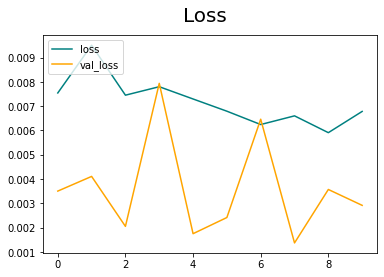

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

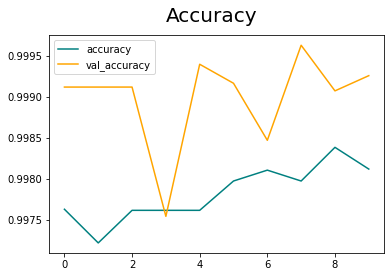

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.save('lurah_cnn_handwriting_mobilenet_2.h5')

In [ ]:
from tensorflow.keras.metrics import Accuracy

In [ ]:
acc = Accuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
  X,y_list = batch
  y_prob_list = model.predict(X)
  yhat_list = []
  for i,yprob in enumerate(y_prob_list) : 
    yhat = np.argmax(yprob)
    yhat_list.append(yhat_list)
    acc.update_state(y_list[i],yhat)
  
  
  
    
  

1/1 [==============================] - 0s 108ms/step


In [ ]:
print(acc.result())

tf.Tensor(0.9983259, shape=(), dtype=float32)
